# Import

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cleaning Data

In [2]:
df = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [4]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [5]:
dup = df.duplicated()
print(f"Number of duplicate rows: {dup.sum()}")

Number of duplicate rows: 0


# EDA

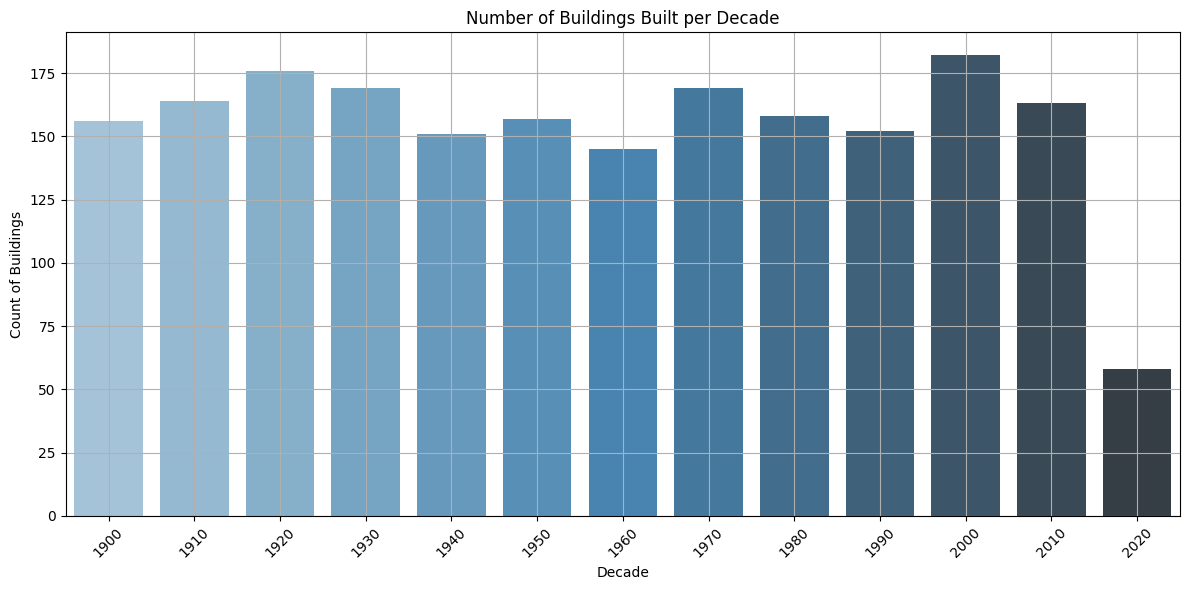

In [ ]:
df['Decade'] = (df['YearBuilt'] // 10) * 10
decade_counts = df.groupby('Decade')['Id'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=decade_counts, x='Decade', y='Id', palette='Blues_d')

plt.title('Number of Buildings Built per Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Buildings')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

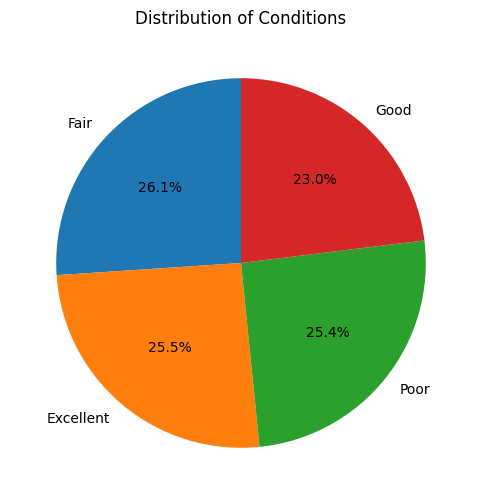

In [ ]:
condition_counts = df['Condition'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Conditions')

plt.show()

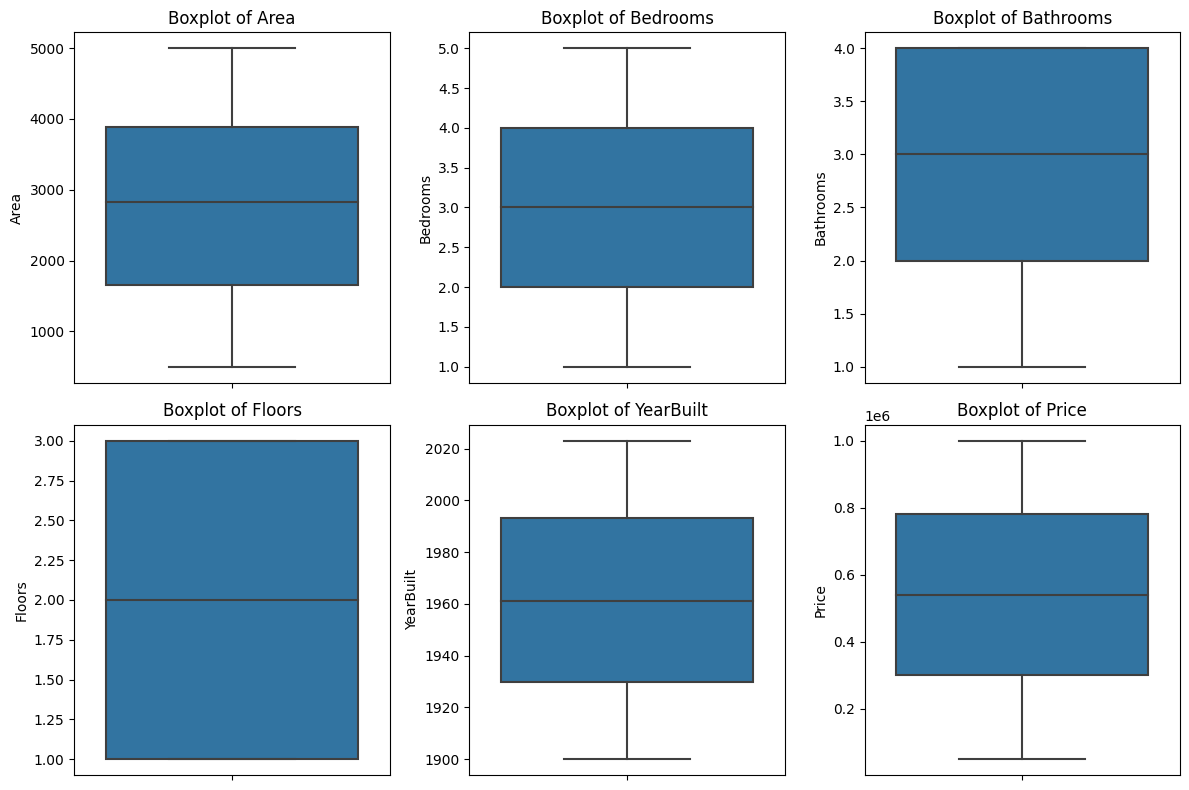

In [8]:
numerical_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

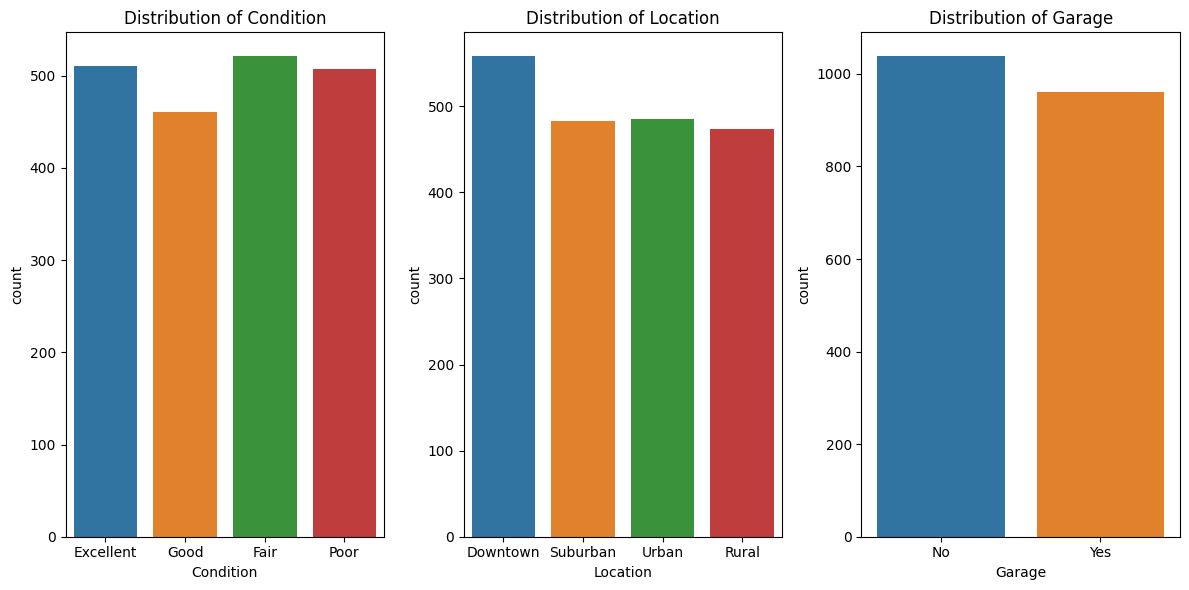

In [9]:
categorical_columns = ['Condition', 'Location', 'Garage']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

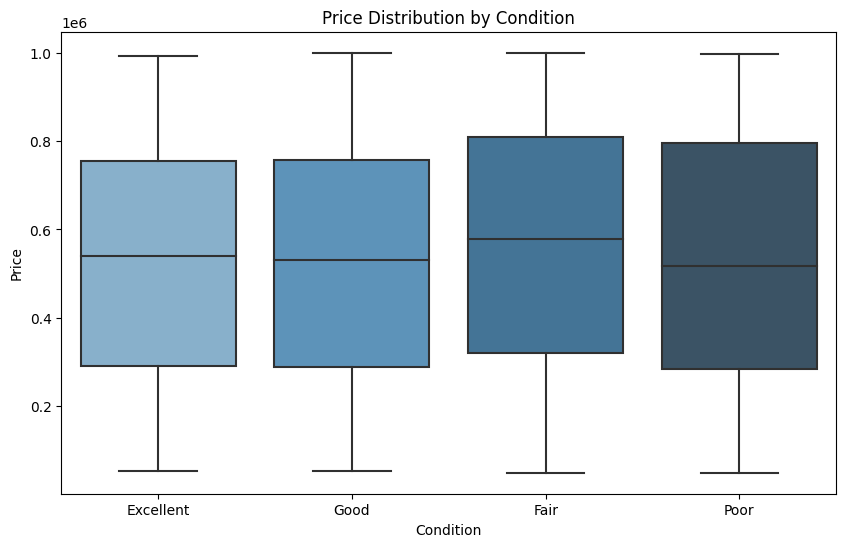

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Condition', y='Price', palette='Blues_d')
plt.title('Price Distribution by Condition')
plt.show()

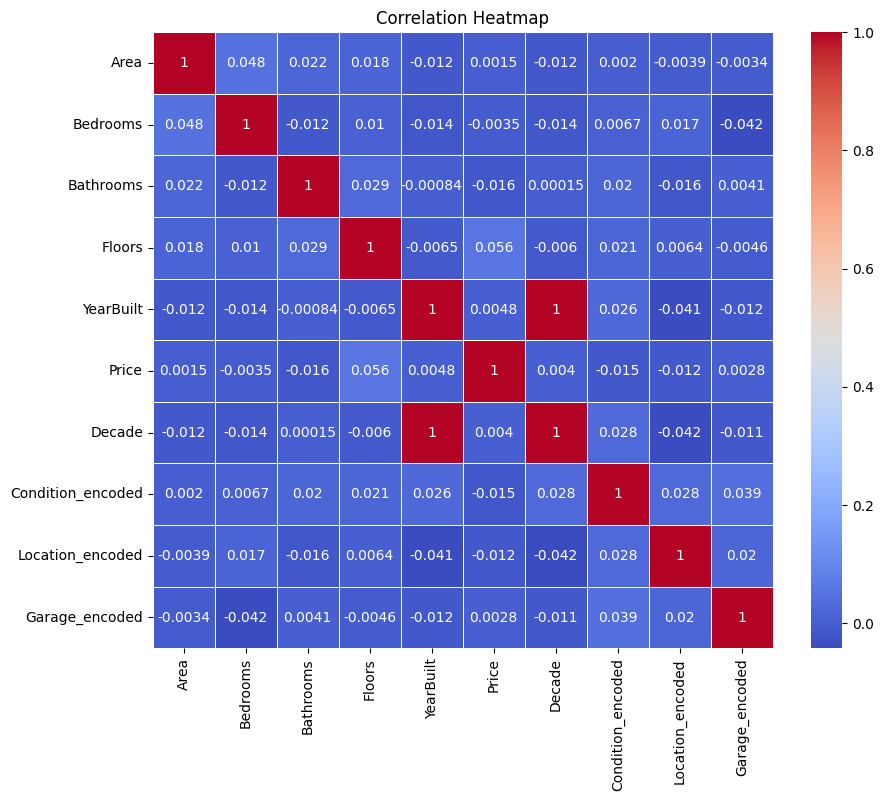

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

a = df.drop(columns=categorical_columns + ['Id']) 

corr_matrix = a.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Predict

In [ ]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Decade', 
        'Condition_encoded', 'Location_encoded', 'Garage_encoded']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) score: {r2}')


Mean Squared Error (MSE): 78922083234.53447
R-squared (R²) score: -0.014437938668289796
